## Observations and Insights 

In [1]:
#Observations
#1. Tumor Volume and Mouse weight related - can tell this from the correlation being close to 1 and the data having a positive linear regression value.
#2. The only outlier in the data appeared to be for for infubinol, which impacts the mean and can skew the data in the dataset.
#3. Capomulin and Ramicane presented similar summary statistics, line plosts, catter plots, and box plots. I went back and did line plots for Ramicane and Infubiunol to look at connections. The line plots for Ramicane and Capomulin are very close. Ramicane would be another treatment to check out in reducing tumor volumn just like Capomulin due to the data.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset via merge
combinedDF = pd.merge(mouse_metadata,study_results,how="left", on="Mouse ID")

# Display the data table for preview
combinedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = combinedDF["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_data = combinedDF[combinedDF.duplicated(["Mouse ID","Timepoint"])]
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#equal-to duplicated mice id
duplicated_mice = combinedDF.loc[combinedDF["Mouse ID"] =="g989"]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#some confusion in class around which number was correct so I'm presenting an alternative way of duplicates for the duplciated mice
#dropduplicatedmicedata = combinedDF.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="last")
#dropduplicatedmicedata

In [7]:
mouse_dataDF = combinedDF.loc[combinedDF["Mouse ID"] != "g989"]
mouse_dataDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame. 
#This number makes sense because we dropped one unique Mouse ID despite dropping rows
num_mice_mouse_df = mouse_dataDF["Mouse ID"].nunique()
num_mice_mouse_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#summary_statistics_group.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_statistics_group = mouse_dataDF.groupby(["Drug Regimen"])
#summary_statistics_group
Drug_Regimen_Mean = summary_statistics_group["Tumor Volume (mm3)"].mean()
#mean
Drug_Regimen_Median = summary_statistics_group["Tumor Volume (mm3)"].median()
#median
Drug_Regimen_Variance = summary_statistics_group["Tumor Volume (mm3)"].var()
#variance
Drug_Regimen_Standard_Deviation = summary_statistics_group["Tumor Volume (mm3)"].std()
#std
Drug_Regimen_Standard_Error_Measurement = summary_statistics_group["Tumor Volume (mm3)"].sem()
#sem

# Assemble the resulting series into a single summary dataframe.
summaryDF = pd.DataFrame({"Tumor Volume Mean":Drug_Regimen_Mean , "Tumor Volume Median": Drug_Regimen_Median, "Tumor Volume Variance": Drug_Regimen_Variance,"Tumor Volume Standard Deviation":Drug_Regimen_Standard_Deviation,"Tumor Volume Standard Error Measurement":Drug_Regimen_Standard_Error_Measurement})
summaryDF


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_group = mouse_dataDF.groupby(["Drug Regimen"])
# Using the aggregation method, produce the same summary statistics in a single line
tester=summary_statistics_group.agg({f"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tester
#testerDF = pd.DataFrame({"Drug Regimen":"mean"})
#testerDF                      


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

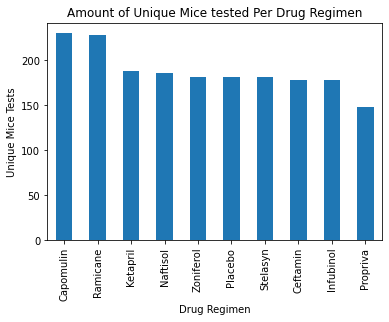

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Generate a bar plot using both Pandas's DataFrame.plot() 

#get mice IDs minus your duplicated mouse ID 
mouse_dataDF = combinedDF.loc[combinedDF["Mouse ID"] != "g989"]
#mouse_dataDF

#group your drug regimens by mice
drug_regimen = mouse_dataDF.groupby(["Drug Regimen"])
#drug_regimen

#count
mice_tested = mouse_dataDF["Drug Regimen"].value_counts()
#mice_tested

#DataFrame.plot(*args, **kwargs)
mice_tested.plot(kind = "bar",title="Amount of Unique Mice tested Per Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Tests")
plt.xticks(rotation=90)
plt.show()


Text(0, 0.5, 'Unique Mice Tests')

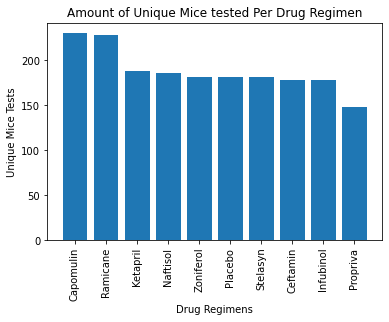

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#Matplotlib's pyplot that shows  the number of total mice
#Need x axis and y axis. x axis is your drug regimens, y axis is your mouse counts like above

#get the counts of your mice and their drug treatments
mice_tested = mouse_dataDF["Drug Regimen"].value_counts()
#mice_tested

#get your x axis which is your drugs which is the index of your mice testedDF
drugs_x = mice_tested.index

#get your y axis which are the values in your dictionary/column of mice tested. Note this will give an error if values in the array are not returned from the array (matplotlib plot numpy.ndarray error)
mice_counts_y = mice_tested.values

#labels=(["Unique Mice Count","Drugs"])
#mice_tests
plt.bar(drugs_x,mice_counts_y)
plt.xticks(rotation=90)
plt.title("Amount of Unique Mice tested Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Unique Mice Tests")


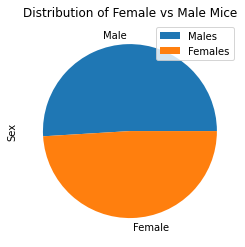

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#DataFrame.plot() 

#group the sexes
distribution = mouse_dataDF.groupby(["Sex"])
distribution

#count the sexes by the grouping and pull frequencies of genders in the Sex column
sex_count = mouse_dataDF["Sex"].value_counts()
sex_count
genders = (["Males","Females"])

sex_count.plot(kind = "pie",title="Distribution of Female vs Male Mice")
plt.legend(genders)

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

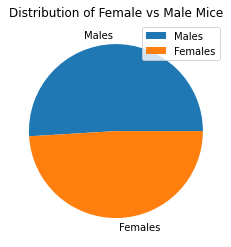

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Matplotlib's pyplot
distribution = mouse_dataDF.groupby(["Sex"])
distribution

#same concept as above gives you a similar output.
sex_count = mouse_dataDF["Sex"].value_counts()
sex_count
labels = (["Males","Females"])
plt.pie(sex_count,labels=labels)
genders = (["Males","Females"])
plt.legend(genders)
plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_dataDF = combinedDF.loc[combinedDF["Mouse ID"] != "g989"]

Timepoint = mouse_dataDF.groupby(["Mouse ID"])
TimepointDF = Timepoint["Timepoint"].max()
TimepointDF
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#test = mouse_dataDF = combinedDF.loc[combinedDF["Mouse ID"] != "g989"]
test = pd.merge(TimepointDF,mouse_dataDF,how="left", on=["Mouse ID","Timepoint"])
test


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#Since there were only 4 ran this one by one by a quick copy and paste then changing of regimen
capomulin = test.loc[test["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin.quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"capomulin lower is : {capomulin_lowerq}")
print(f"capomulin upper is : {capomulin_upperq}")
print(f"capomulin iqr is : {capomulin_iqr}")

print(f"capomulin potential outliers are any values below {capomulin_lower_bound} and any values above {capomulin_upper_bound}")
          

capomulin lower is : 32.37735684
capomulin upper is : 40.1592203
capomulin iqr is : 7.781863460000004
capomulin potential outliers are any values below 20.70456164999999 and any values above 51.83201549


In [17]:
ramicane = test.loc[test["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_quartiles = ramicane.quantile([0.25,0.5,0.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"ramicane lower is : {ramicane_lowerq}")
print(f"ramicane upper is : {ramicane_upperq}")
print(f"ramicane iqr is : {ramicane_iqr}")
      
# Determine outliers using upper and lower bounds
print(f"capomulin potential outliers are any values below {ramicane_lower_bound} and any values above {ramicane_upper_bound}")
    

ramicane lower is : 31.56046955
ramicane upper is : 40.65900627
ramicane iqr is : 9.098536719999998
capomulin potential outliers are any values below 17.912664470000003 and any values above 54.30681135


In [18]:
infubinol = test.loc[test["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_quartiles = infubinol.quantile([0.25,0.5,0.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"infubinol lower is : {infubinol_lowerq}")
print(f"infubinol upper is : {infubinol_upperq}")
print(f"infubinol iqr is : {infubinol_iqr}")

# Determine outliers using upper and lower bounds
print(f"capomulin potential outliers are any values below {infubinol_lower_bound} and any values above {infubinol_upper_bound}")
    

infubinol lower is : 54.04860769
infubinol upper is : 65.52574285
infubinol iqr is : 11.477135160000003
capomulin potential outliers are any values below 36.83290494999999 and any values above 82.74144559000001


In [19]:
ceftamin = test.loc[test["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_quartiles = ceftamin.quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"ceftamin lower is : {ceftamin_lowerq}")
print(f"ceftamin upper is : {ceftamin_upperq}")
print(f"ceftamin iqr is : {ceftamin_iqr}")
      
# Determine outliers using upper and lower bounds
print(f"capomulin potential outliers are any values below {ceftamin_lower_bound} and any values above {ceftamin_upper_bound}")
   

ceftamin lower is : 48.72207785
ceftamin upper is : 64.29983003
ceftamin iqr is : 15.577752179999997
capomulin potential outliers are any values below 25.355449580000002 and any values above 87.66645829999999


Text(0.5, 1.0, 'Tumor Volume (mm3) in Mice Across Drug Regimens')

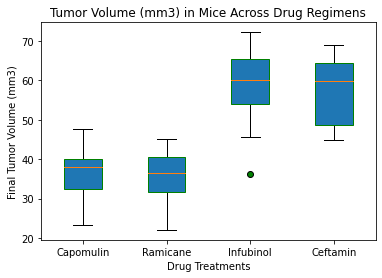

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
c = "g"
blue_dict = {"patch_artist":True,"boxprops": dict(color=c)}
flierprops = dict(marker="o", markerfacecolor="g")
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],**blue_dict,flierprops=flierprops)
plt.xlabel("Drug Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) in Mice Across Drug Regimens")


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 with Capomulin Treatment')

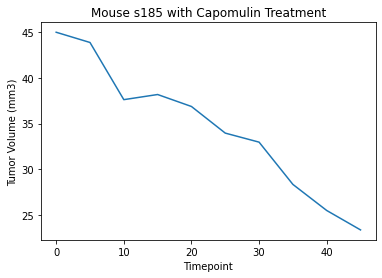

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mouse_dataDF.loc[mouse_dataDF["Drug Regimen"] == "Capomulin"]
#capomulin_micese

#pull all capulin treatment mice ids and choose one
mouse_id = mouse_dataDF.loc[mouse_dataDF["Mouse ID"]=="s185"]
mouse_id

plt.plot(mouse_id["Timepoint"],mouse_id["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 with Capomulin Treatment")


In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Ramicane
#ramicane_mice = mouse_dataDF.loc[mouse_dataDF["Drug Regimen"] == "Ramicane"]
#ramicane_mice

#mouse_id = mouse_dataDF.loc[mouse_dataDF["Mouse ID"]=="k403"]
#mouse_id

#plt.plot(mouse_id["Timepoint"],mouse_id["Tumor Volume (mm3)"])
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title("Mouse s185 with Ramicane Treatment")


In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Infubinol
#infubinol_mice = mouse_dataDF.loc[mouse_dataDF["Drug Regimen"] == "Infubinol"]
#infubinol_mice

#mouse_id = mouse_dataDF.loc[mouse_dataDF["Mouse ID"]=="a203"]
#mouse_id

#plt.plot(mouse_id["Timepoint"],mouse_id["Tumor Volume (mm3)"])
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title("Mouse s185 with Infubinol Treatment")


Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight(g)')

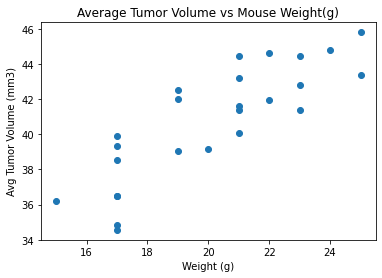

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = mouse_dataDF.loc[mouse_dataDF["Drug Regimen"] == "Capomulin"]
cap_mice_avg = capomulin_mice.groupby(["Mouse ID"]).mean()
#cap_mice_avg

plt.scatter(cap_mice_avg["Weight (g)"],cap_mice_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight(g)")

## Correlation and Regression

The correletion between both factors is: 0.8419363424694717
the r-squared is: 0.7088568047708717
y =0.95x+21.55


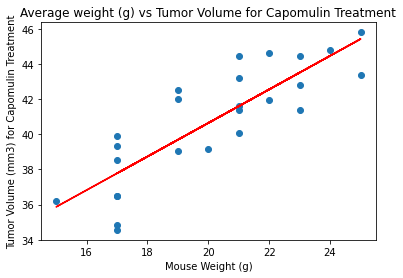

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Correlation coefficient - slopes, to determine the direction that data goes in when graphed to represent value between positive or negative 1
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) - < tuple
correlation = st.pearsonr(cap_mice_avg["Weight (g)"],cap_mice_avg["Tumor Volume (mm3)"])
print(f"The correletion between both factors is: {(correlation[0])}")

x_values = cap_mice_avg["Weight (g)"]
y_values = cap_mice_avg["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(cap_mice_avg["Weight (g)"],cap_mice_avg["Tumor Volume (mm3)"])

regress_values = cap_mice_avg["Weight (g)"] * slope + intercept
print(f"the r-squared is: {rvalue**2}")

line_eq = "y =" + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3) for Capomulin Treatment")
plt.title("Average weight (g) vs Tumor Volume for Capomulin Treatment")
print(line_eq)
plt.plot(x_values,regress_values,"-r")